## Problema de la lavadora

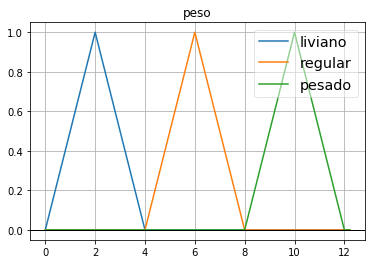

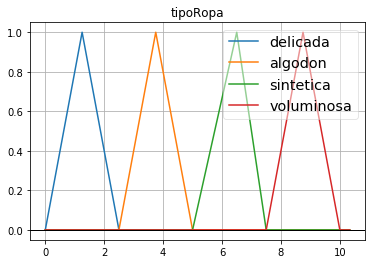

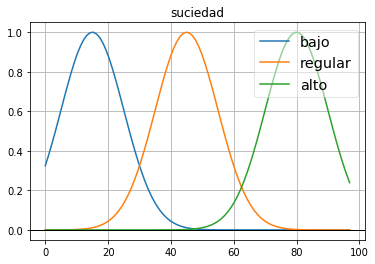

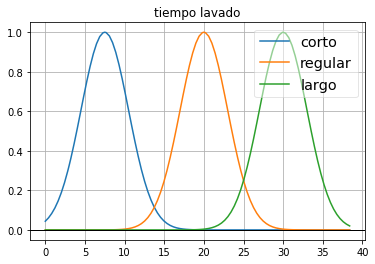

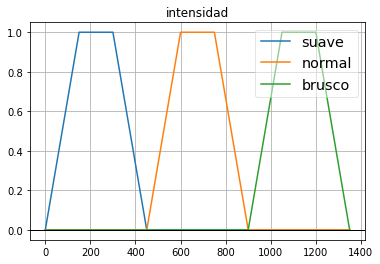

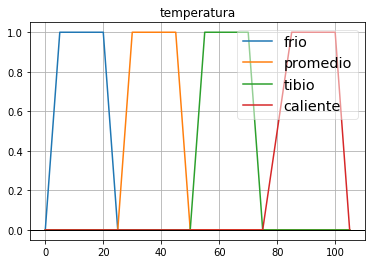

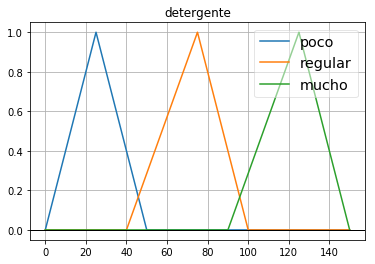

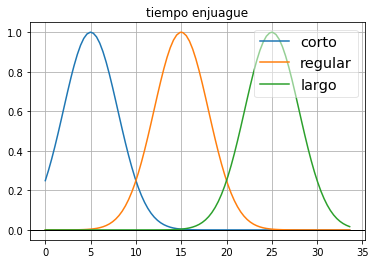

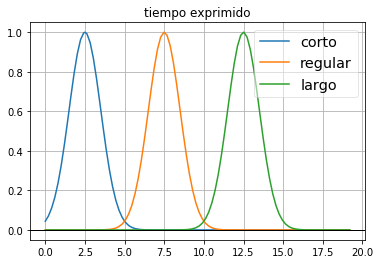

In [90]:
from FuzzySystem.FuzzySet import  FuzzySet
from FuzzySystem.FuzzyVariable import  FuzzyVariable
from FuzzySystem.FuzzyInferenceSystem import  FuzzyInferenceSystem, Antecedent,Consequent, FuzzyRule 
from FuzzySystem.Defuzzifier import Centroid,Heights, CenterOfSets
from FuzzySystem.MembershipFunction import Trimf, Gaussmf, GBellmf, Logmf, Tanhmf, Trapmf, Sigmoidmf, Cauchymf

#INPUTS

# 1- Peso de carga (kilogramos)
peso_liviano = FuzzySet('liviano', Trimf([0,2,4]))
peso_regular = FuzzySet('regular', Trimf([4,6,8]))
peso_pesado = FuzzySet('pesado', Trimf([8,10,12]))
peso = FuzzyVariable('peso',[peso_liviano,peso_regular,peso_pesado],universe=[0,13])
peso.show()

# 2 Tipo de ropa
tipoRopa_delicada = FuzzySet('delicada', Trimf([0,1.25,2.5]))
tipoRopa_algodon = FuzzySet('algodon', Trimf([2.5,3.75, 5]))
tipoRopa_sintetica = FuzzySet('sintetica', Trimf([5,6.5, 7.5]))
tipoRopa_voluminosa = FuzzySet('voluminosa', Trimf([7.5,8.75, 10]))
tipoRopa = FuzzyVariable('tipoRopa',[tipoRopa_delicada, tipoRopa_algodon, tipoRopa_sintetica,tipoRopa_voluminosa], universe=[0, 11])
tipoRopa.show()

# 3 Nivel de suciedad
suciedad_bajo = FuzzySet('bajo', Gaussmf([10, 15]))
suciedad_regular = FuzzySet('regular', Gaussmf([10, 45]))
suciedad_alto = FuzzySet('alto', Gaussmf([10, 80]))
suciedad = FuzzyVariable('suciedad',[suciedad_bajo,suciedad_regular,suciedad_alto], universe=[0, 101])
suciedad.show()


#OUTPUT
# 1 Tiempo de lavado (minutos)
tiempoLav_corto = FuzzySet('corto', Gaussmf([3, 7.5]))
tiempoLav_regular = FuzzySet('regular', Gaussmf([3, 20]))
tiempoLav_largo = FuzzySet('largo', Gaussmf([3, 30]))
tiempoLav = FuzzyVariable('tiempo lavado', [tiempoLav_corto, tiempoLav_regular,tiempoLav_largo], universe=[0, 40])
tiempoLav.show()

# 2 Intensidad de lavado
intensidad_suave = FuzzySet('suave', Trapmf([0,150,300,450]))
intensidad_normal = FuzzySet('normal', Trapmf([450,600,750,900]))
intensidad_brusco = FuzzySet('brusco', Trapmf([900, 1050,1200,1350]))
intensidad = FuzzyVariable('intensidad', [intensidad_suave, intensidad_normal,intensidad_brusco], universe=[0, 1400])
intensidad.show()

# 3 Temperatura del agua (Farenheit)
temperatura_frio = FuzzySet('frio', Trapmf([0,5,20,25]))
temperatura_promedio = FuzzySet('promedio', Trapmf([25,30,45,50]))
temperatura_tibio = FuzzySet('tibio', Trapmf([50,55,70,75]))
temperatura_caliente = FuzzySet('caliente', Trapmf([75,85,100,105]))
temperatura = FuzzyVariable('temperatura', [temperatura_frio, temperatura_promedio,temperatura_tibio,temperatura_caliente], universe=[0, 90])
temperatura.show()

# 4 Cantidad de detergente (mililitros)
detergente_poco = FuzzySet('poco', Trimf([0,25,50]))
detergente_regular = FuzzySet('regular', Trimf([40,75,100]))
detergente_mucho = FuzzySet('mucho', Trimf([90,125,150]))
detergente = FuzzyVariable('detergente', [detergente_poco, detergente_regular, detergente_mucho], universe=[0, 151])
detergente.show()

# 5 Tiempo de enjuague (minutos)
tiempoEnj_corto = FuzzySet('corto', Gaussmf([3, 5]))
tiempoEnj_regular = FuzzySet('regular', Gaussmf([3, 15]))
tiempoEnj_largo = FuzzySet('largo', Gaussmf([3, 25]))
tiempoEnj = FuzzyVariable('tiempo enjuague', [tiempoEnj_corto, tiempoEnj_regular,tiempoEnj_largo], universe=[0, 35])
tiempoEnj.show()

# 6 Tiempo de exprimido (minutos)
tiempoExp_corto = FuzzySet('corto', Gaussmf([1, 2.5]))
tiempoExp_regular = FuzzySet('regular', Gaussmf([1, 7.5]))
tiempoExp_largo = FuzzySet('largo', Gaussmf([1, 12.5]))
tiempoExp = FuzzyVariable('tiempo exprimido', [tiempoExp_corto, tiempoExp_regular,tiempoExp_largo], universe=[0, 20])
tiempoExp.show()


#RULES
ant1  = Antecedent(peso['liviano'] & tipoRopa['delicada'] & suciedad['bajo'])
cont1 = Consequent(tiempoLav['corto'])
cont1.add(intensidad['suave'])
cont1.add(temperatura['frio'])
cont1.add(detergente['poco'])
cont1.add(tiempoEnj['corto'])
cont1.add(tiempoExp['corto'])
rule1 = FuzzyRule(ant1, cont1)

ant2  = Antecedent(peso['liviano'] & tipoRopa['sintetica'] & suciedad['alto'])
cont2 = Consequent(tiempoLav['regular'],conector=min)
cont2.add(intensidad['normal'])
cont2.add(temperatura['tibio'])
cont2.add(detergente['mucho'])
cont2.add(tiempoEnj['largo'])
cont2.add(tiempoExp['largo'])
rule2 = FuzzyRule(ant2, cont2)

ant3  = Antecedent(peso['regular'] & tipoRopa['algodon'] & suciedad['regular'])
cont3 = Consequent(tiempoLav['regular'],conector=min)
cont3.add(intensidad['normal'])
cont3.add(temperatura['promedio'])
cont3.add(detergente['regular'])
cont3.add(tiempoEnj['regular'])
cont3.add(tiempoExp['regular'])
rule3 = FuzzyRule(ant3, cont3)

ant4  = Antecedent(peso['regular'] & tipoRopa['delicada'] & suciedad['bajo'])
cont4 = Consequent(tiempoLav['regular'],conector=min)
cont4.add(intensidad['suave'])
cont4.add(temperatura['frio'])
cont4.add(detergente['regular'])
cont4.add(tiempoEnj['regular'])
cont4.add(tiempoExp['corto'])
rule4 = FuzzyRule(ant4, cont4)

ant5  = Antecedent(peso['pesado'] & tipoRopa['sintetica'] & suciedad['regular'])
cont5 = Consequent(tiempoLav['largo'],conector=min)
cont5.add(intensidad['normal'])
cont5.add(temperatura['tibio'])
cont5.add(detergente['regular'])
cont5.add(tiempoEnj['largo'])
cont5.add(tiempoExp['largo'])
rule5 = FuzzyRule(ant5, cont5)

ant6  = Antecedent(peso['pesado'] & tipoRopa['voluminosa'] & suciedad['alto'])
cont6 = Consequent(tiempoLav['largo'],conector=min)
cont6.add(intensidad['brusco'])
cont6.add(temperatura['caliente'])
cont6.add(detergente['mucho'])
cont6.add(tiempoEnj['largo'])
cont6.add(tiempoExp['largo'])
rule6 = FuzzyRule(ant6, cont6)


#Building the FIS
fis = FuzzyInferenceSystem([rule1,rule2,rule3,rule4,rule5,rule6], and_op='prod', or_op='sum')                


# Caso de prueba 1


Evaluation of FIS with inputs:
peso: 2
tipoRopa: 1
suciedad: 10
	IF peso is liviano and tipoRopa is delicada and suciedad is bajo THEN tiempo lavado is corto and intensidad is suave and temperatura is frio and detergente is poco and tiempo enjuague is corto and tiempo exprimido is corto = [0.7059975220676764] with weight = 1
	IF peso is liviano and tipoRopa is sintetica and suciedad is alto THEN tiempo lavado is regular and intensidad is normal and temperatura is tibio and detergente is mucho and tiempo enjuague is largo and tiempo exprimido is largo = [2.289734845645553e-11] with weight = 1
	IF peso is regular and tipoRopa is algodon and suciedad is regular THEN tiempo lavado is regular and intensidad is normal and temperatura is promedio and detergente is regular and tiempo enjuague is regular and tiempo exprimido is regular = [0.0] with weight = 1
	IF peso is regular and tipoRopa is delicada and suciedad is bajo THEN tiempo lavado is regular and intensidad is suave and temperatura 

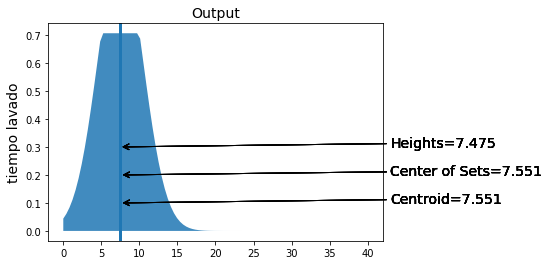

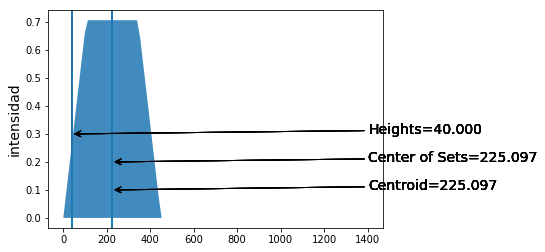

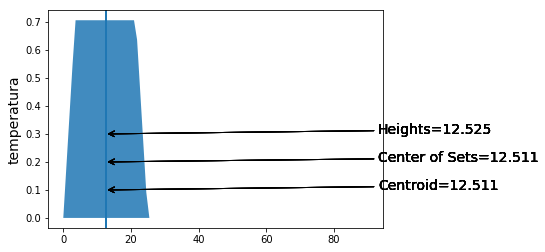

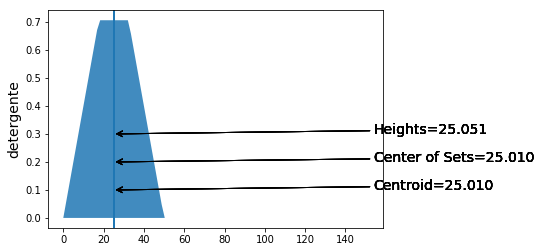

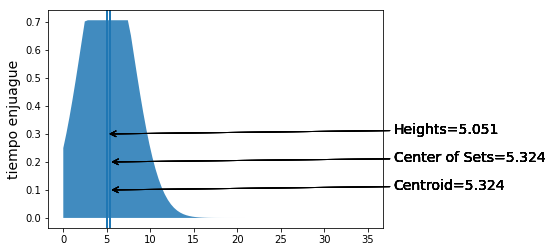

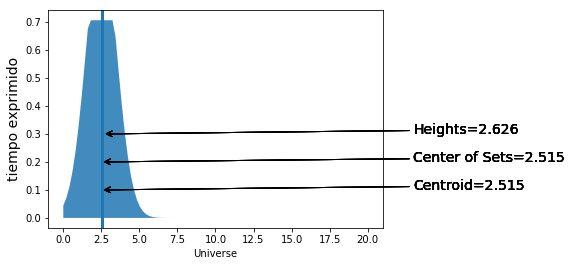

In [91]:
#FIS Evaluation

inputs = {'peso':2, 'tipoRopa':1,'suciedad':10}
result = fis.eval(inputs)
result.show([Centroid, CenterOfSets, Heights])

In [65]:
Centroid(result).eval()

{'tiempo lavado': array(7.54561783),
 'intensidad': array(225.07261972),
 'temperatura': array(12.51061779),
 'detergente': array(25.00805608),
 'tiempo enjuague': array(5.2906869),
 'tiempo exprimido': array(2.51388802)}

In [49]:
Heights(result).eval()

{'tiempo lavado': array(7.47474748),
 'intensidad': array(40.),
 'temperatura': array(12.32323232),
 'detergente': array(25.05050505),
 'tiempo enjuague': array(5.05050505),
 'tiempo exprimido': array(2.42424242)}

In [74]:
CenterOfSets(result).eval()

{'tiempo lavado': array(7.54561783),
 'intensidad': array(225.07261972),
 'temperatura': array(12.51061779),
 'detergente': array(25.00805608),
 'tiempo enjuague': array(5.2906869),
 'tiempo exprimido': array(2.51388802)}

# Caso de prueba 2


Evaluation of FIS with inputs:
peso: 6
tipoRopa: 5
suciedad: 60
	IF peso is liviano and tipo ropa is delicada and suciedad is bajo THEN tiempo lavado is corto and intensidad is suave and temperatura is frio and detergente is poco and tiempo enjuague is corto and tiempo exprimido is corto = 0.0 with weight = 1
	IF peso is liviano and tipo ropa is sintetica and suciedad is alto THEN tiempo lavado is regular and intensidad is normal and temperatura is tibio and detergente is mucho and tiempo enjuague is largo and tiempo exprimido is largo = 0.0 with weight = 1
	IF peso is regular and tipo ropa is algodon and suciedad is regular THEN tiempo lavado is regular and intensidad is normal and temperatura is promedio and detergente is regular and tiempo enjuague is regular and tiempo exprimido is regular = 0.32465246735834974 with weight = 1
	IF peso is regular and tipo ropa is delicada and suciedad is bajo THEN tiempo lavado is regular and intensidad is suave and temperatura is frio and deterge

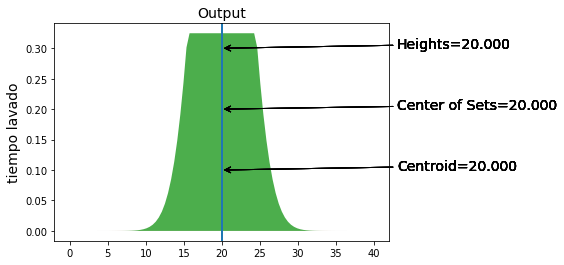

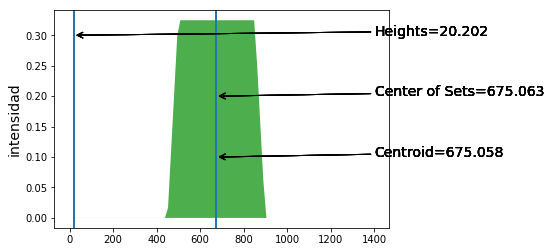

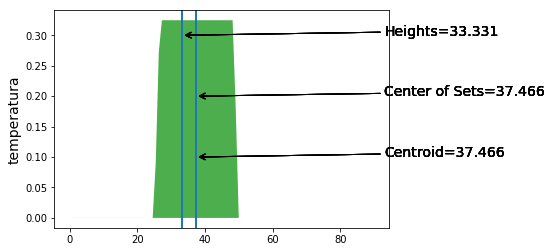

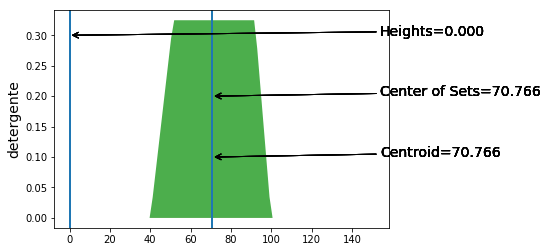

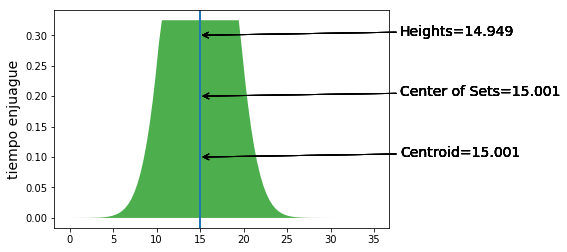

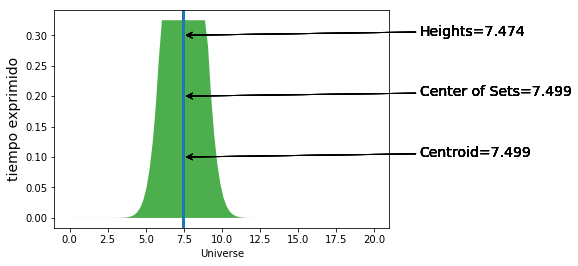

In [71]:
#FIS Evaluation

inputs2 = {'peso':6, 'tipoRopa':5,'suciedad':60}
result2 = fis.eval(inputs2)

result2.show([Centroid, CenterOfSets, Heights])

In [64]:
Centroid(result2).eval()

{'tiempo lavado': array(20.),
 'intensidad': array(675.24466919),
 'temperatura': array(37.41749364),
 'detergente': array(70.33989746),
 'tiempo enjuague': array(15.00016488),
 'tiempo exprimido': array(7.502474)}

In [50]:
Heights(result2).eval()

{'tiempo lavado': array(20.),
 'intensidad': array(20.2020202),
 'temperatura': array(32.92873109),
 'detergente': array(0.),
 'tiempo enjuague': array(14.94949495),
 'tiempo exprimido': array(7.47464178)}

In [75]:
CenterOfSets(result2).eval()

{'tiempo lavado': array(20.),
 'intensidad': array(675.06348432),
 'temperatura': array(37.46648535),
 'detergente': array(70.76633989),
 'tiempo enjuague': array(15.00091024),
 'tiempo exprimido': array(7.49910509)}

# Caso de prueba 3


Evaluation of FIS with inputs:
peso: 9
tipoRopa: 8
suciedad: 80
	IF peso is liviano and tipo ropa is delicada and suciedad is bajo THEN tiempo lavado is corto and intensidad is suave and temperatura is frio and detergente is poco and tiempo enjuague is corto and tiempo exprimido is corto = 0.0 with weight = 1
	IF peso is liviano and tipo ropa is sintetica and suciedad is alto THEN tiempo lavado is regular and intensidad is normal and temperatura is tibio and detergente is mucho and tiempo enjuague is largo and tiempo exprimido is largo = 0.0 with weight = 1
	IF peso is regular and tipo ropa is algodon and suciedad is regular THEN tiempo lavado is regular and intensidad is normal and temperatura is promedio and detergente is regular and tiempo enjuague is regular and tiempo exprimido is regular = 0.0 with weight = 1
	IF peso is regular and tipo ropa is delicada and suciedad is bajo THEN tiempo lavado is regular and intensidad is suave and temperatura is frio and detergente is regular a

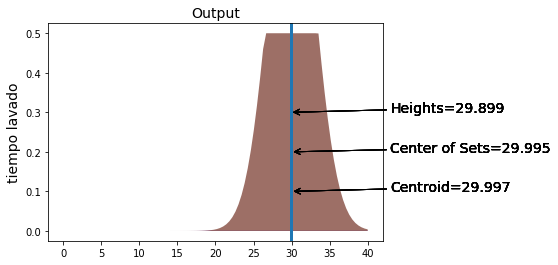

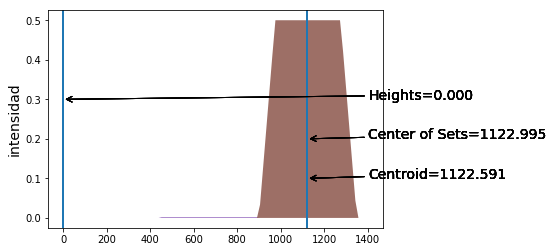

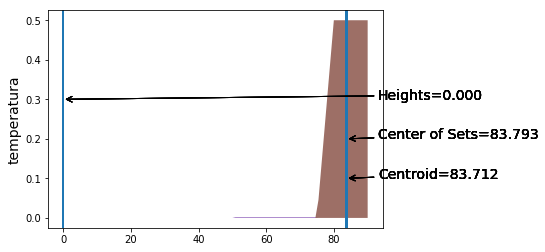

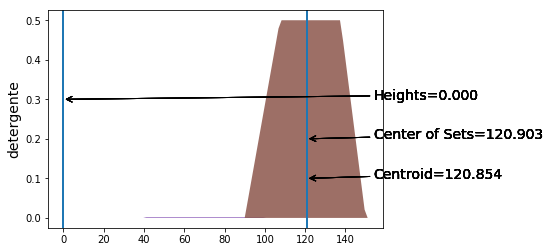

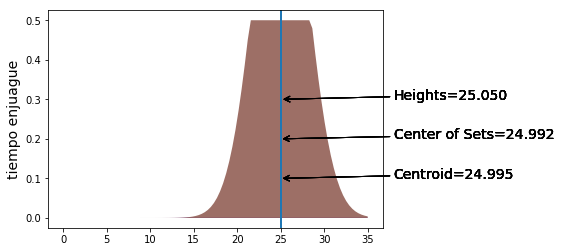

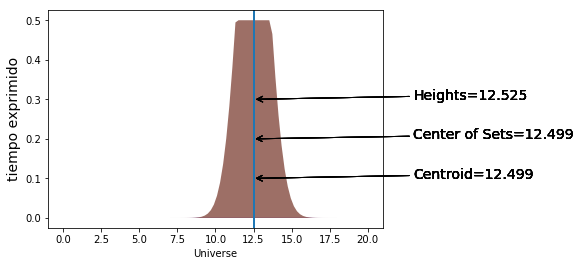

{'tiempo lavado': array(29.99741498),
 'intensidad': array(1122.59098029),
 'temperatura': array(83.71167834),
 'detergente': array(120.85449864),
 'tiempo enjuague': array(24.99465086),
 'tiempo exprimido': array(12.49870784)}

In [62]:
#FIS Evaluation
inputs3 = {'peso':9, 'tipoRopa':8,'suciedad':80}
result3 = fis.eval(inputs3)

result3.show([Centroid, CenterOfSets, Heights])

In [63]:
Centroid(result3).eval()

{'tiempo lavado': array(29.99741498),
 'intensidad': array(1122.59098029),
 'temperatura': array(83.71167834),
 'detergente': array(120.85449864),
 'tiempo enjuague': array(24.99465086),
 'tiempo exprimido': array(12.49870784)}

In [51]:
Heights(result3).eval()

{'tiempo lavado': array(29.8989899),
 'intensidad': array(0.),
 'temperatura': array(0.),
 'detergente': array(0.),
 'tiempo enjuague': array(25.04962507),
 'tiempo exprimido': array(12.52525253)}

In [76]:
CenterOfSets(result3).eval()

{'tiempo lavado': array(29.99498293),
 'intensidad': array(1122.9945363),
 'temperatura': array(83.79318732),
 'detergente': array(120.90300472),
 'tiempo enjuague': array(24.99214768),
 'tiempo exprimido': array(12.49872692)}